In [5]:
import numpy as np 
import matplotlib.pyplot as plt #type: ignore 
np.set_printoptions(suppress=True)

In [6]:
item1_embedding = np.array([1,2, -3, 4]) 
item2_embedding = np.array([2, -3, -2, 4])

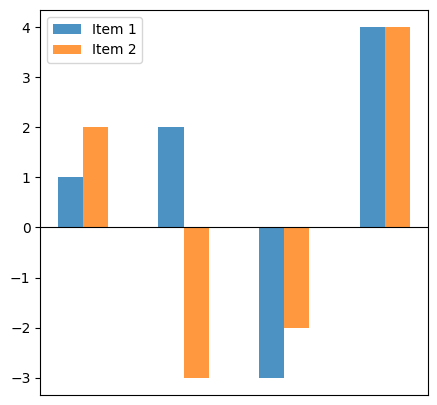

In [7]:
def plot_embeddings(emb1, emb2): 
    plt.figure(figsize=(5,5)) 
    plt.bar(np.arange(len(emb1)), emb1, width=0.25, alpha=0.8, label='Item 1')
    plt.bar(np.arange(len(emb2)) + 0.25, emb2, width=0.25, alpha=0.8, label='Item 2')
    plt.axhline(0, color='black', linewidth=0.8)
    plt.xticks([])
    plt.legend() 
    plt.show() 
plot_embeddings(item1_embedding, item2_embedding)

In [8]:
product = item2_embedding * item1_embedding 
print(product)

[ 2 -6  6 16]


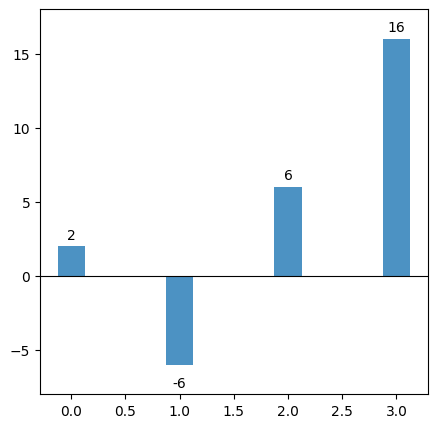

In [9]:
plt.figure(figsize=(5,5)) 
plt.bar(np.arange(len(product)), product, width=0.25, alpha=0.8) 
plt.axhline(0, color='black', linewidth=0.8)
for i, v in enumerate(product): 
    plt.text(i, v + 0.5 if v >= 0 else v - 1.5, v, ha='center')
plt.xticks() 
plt.ylim(-8, 18)
plt.show()

In [10]:
item_embeddings = np.array([
    [1, 2, -3, 4],
    [2, -3, -2, 4],
    [-1, -2, 3, -4] 
])
search_embeddings = np.array([
    [1,2,-3,4] , 
])
products = item_embeddings * search_embeddings 
print(f"{item_embeddings.shape=} {search_embeddings.shape=}{products.shape=}")

item_embeddings.shape=(3, 4) search_embeddings.shape=(1, 4)products.shape=(3, 4)


In [11]:
products

array([[  1,   4,   9,  16],
       [  2,  -6,   6,  16],
       [ -1,  -4,  -9, -16]])

In [12]:
products.sum(axis=1, keepdims=True)

array([[ 30],
       [ 18],
       [-30]])

In [16]:
prod = np.matmul(item_embeddings, search_embeddings.T)
print(prod)

[[ 30]
 [ 18]
 [-30]]


ATTENTION SCORES

In [17]:
def softmax(x): 
    return np.exp(x) / np.sum(np.exp(x), axis=0, keepdims=True) 
attention_scores = softmax(prod)
attention_scores

array([[0.99999386],
       [0.00000614],
       [0.        ]])

Reducing skew

In [18]:
num_items = 4 
num_queries = 1 
embed_sie = 4 
item_embeddings =np.random.uniform(-1, 1, size=(num_items, embed_sie))
search_embeddings=np.random.uniform(-1,1,size=(num_queries, embed_sie)) 
prod = np.matmul(item_embeddings, search_embeddings.T) 
attention_scores =softmax(prod) 
attention_scores.shape
attention_scores

array([[0.27363647],
       [0.09441364],
       [0.49294237],
       [0.13900752]])

In [21]:
num_items = 4 
num_queries = 1 
embed_sie = 100
item_embeddings =np.random.uniform(-1, 1, size=(num_items, embed_sie))
search_embeddings=np.random.uniform(-1,1,size=(num_queries, embed_sie)) 
prod = np.matmul(item_embeddings, search_embeddings.T)  / np.sqrt(embed_sie)
attention_scores =softmax(prod) 
attention_scores.shape
attention_scores

array([[0.23226602],
       [0.22627515],
       [0.24747212],
       [0.2939867 ]])

Value Embeddings 

In [22]:
def get_attention_scores(key_embeddings, query_embeddings):
    """
    Compute attention scores between keys and queries using dot product and softmax.
    key_embeddings: shape (num_keys, embed_size)
    query_embeddings: shape (num_queries, embed_size)
    Returns: attention scores of shape (num_keys, num_queries)
    """
    # Dot product: (num_keys, embed_size) x (embed_size, num_queries) -> (num_keys, num_queries)
    scores = np.matmul(key_embeddings, query_embeddings.T)
    # Softmax over keys for each query
    exp_scores = np.exp(scores)
    attention_scores = exp_scores / np.sum(exp_scores, axis=0, keepdims=True)
    return attention_scores

In [24]:
num_keys = 3 
num_queries = 1
embed_sie = 4
key_embeddings =np.random.uniform(-1, 1, size=(num_keys, embed_sie))
query_embeddings=np.random.uniform(-1,1,size=(num_queries, embed_sie)) 
value_embeddings=np.random.uniform(-1,1,size=(num_keys ,embed_sie)) 

attention_scores = get_attention_scores(key_embeddings, query_embeddings) 
attention_scores

array([[0.07138134],
       [0.23964482],
       [0.68897384]])

In [25]:
value_embeddings

array([[-0.16994452,  0.59769374, -0.53446142, -0.33017852],
       [-0.24584021, -0.58965713,  0.35116056,  0.84288964],
       [-0.32435043,  0.95897066, -0.71679352,  0.93450711]])

In [27]:
attention_scores.shape

(3, 1)

Context Embeddings

In [28]:
context_embeddings = np.matmul(attention_scores.T, value_embeddings) 
context_embeddings

array([[-0.29451416,  0.5620616 , -0.44784875,  0.8222765 ]])

In [29]:

# Attention scores (assuming these are scalar values for each key)
attention_score_key_0 = 0.2730459 # attention_scores[0] ?
attention_score_key_1 = 0.3755589 # attention_scores[1] ?
attention_score_key_2 = 0.39713952 # attention_scores[2] ?

# Value embeddings (assuming these are vectors for each key)
value_embeddings_0 = np.array([0.70003629, 0.35336437, 0.31262625, 0.41834036]) # value_embeddings[0]
value_embeddings_1 = np.array([0.43152803, 0.95350855, 0.11276216, -0.50571287]) # value_embeddings[1]
value_embeddings_2 = np.array([-0.89242811, 0.71933651, 0.43944879, -0.32860654]) # value_embeddings[2]

# Calculate contribution from each key
# This is a weighted sum, where each value embedding is scaled by its corresponding attention score.
contribution_from_key_0 = attention_score_key_0 * value_embeddings_0
contribution_from_key_1 = attention_score_key_1 * value_embeddings_1
contribution_from_key_2 = attention_score_key_2 * value_embeddings_2

# Print the contributions
print(contribution_from_key_0)
print(contribution_from_key_1)
print(contribution_from_key_2)


[0.19114204 0.09648469 0.08536132 0.11422612]
[ 0.16206419  0.35809862  0.04234883 -0.18992497]
[-0.35441847  0.28567696  0.17452248 -0.13050264]


In [30]:
context_embeddings = contribution_from_key_0 + contribution_from_key_1 + contribution_from_key_2 
context_embeddings

array([-0.00121224,  0.74026027,  0.30223263, -0.20620149])

In [31]:
context_embeddings + query_embeddings

array([[0.54998536, 1.55384765, 0.54417931, 0.55439671]])